In [36]:
# Importación de Librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.close('all')

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import decomposition

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import Image


# <div style="padding:20px;color:orange;margin:0;font-size:35px;font-family:Lucida Bright;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Conjunto de datos Globales de Migrantes Desaparecidos </b></div> 
# <div style="padding:20px;color:orange;margin:0;font-size:30px;font-family:Lucida Bright;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Comprendiendo a los Migrantes Desaparecidos y Sus Trágicos Viajes </b></div> 

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Mostrar Imagen</title>
</head>
<body>
    <img src="https://www.lapatilla.com/wp-content/uploads/2019/07/2019-07-08T200212Z_1_LYNXNPEF671OT_RTROPTP_4_VENEZUELA-POLITICS-COLOMBIA.jpg" alt="Descripción de la imagen" width="600">
</body>
</html>

#### <span style="color:yellow">Este conjunto de datos proporciona un registro completo de migrantes desaparecidos y sus trágicos viajes hacia destinos internacionales, recopilado por el Proyecto Migrantes Desaparecidos, una iniciativa implementada por la Organización Internacional para las Migraciones (OIM) desde 2014. El conjunto de datos documenta muertes y desapariciones, arrojando luz sobre los desafíos que enfrentan los migrantes durante sus viajes. Tenga en cuenta que, debido a las complejidades en la recopilación de datos, las cifras presentadas probablemente sean inferiores a la realidad. El conjunto de datos sirve como un tributo a las personas que perdieron la vida, así como a las familias y comunidades afectadas por su ausencia. </span>

**Incident Type:** Tipo de incidente migratorio

**Incident Year:** Año en que ocurrió el incidente

**Reported Month:** Mes en que se reportó el incidente

**Region of Origin:** Región geográfica de donde originaron los migrantes

**Region of Incident:** Región geográfica donde ocurrió el incidente

**Country of Origin:** País de donde originaron los migrantes

**Number of Dead:** Número de migrantes fallecidos confirmados

**Minimum Estimated Number of Missing:** Recuento mínimo estimado de migrantes desaparecidos

**Total Number of Dead and Missing:** Recuento total de migrantes fallecidos y desaparecidos

**Number of Survivors:** Número de migrantes que sobrevivieron al incidente

**Number of Females:** Número de mujeres migrantes involucradas

**Number of Males:** Número de hombres migrantes involucrados

**Number of Children:** Número de niños migrantes involucrados

**Cause of Death:** Causa de muerte de los migrantes

**Migration Route:** Ruta tomada por los migrantes durante su viaje (si está disponible)

**Location of Death:** Ubicación aproximada donde ocurrió el incidente

**Information Source:** Fuente de información sobre el incidente

**Coordinates:** Coordenadas geográficas de la ubicación del incidente

**UNSD Geographical Grouping:** Agrupación geográfica según la División de Estadísticas de las Naciones Unidas

**En primer lugar procedemos a cargar el archivo 'Global Missing Migrants Dataset.csv, se establece como separador de campos coma (,). El resultado queda en el dataframe llamado: df**

### <span style="color:orange">CONTEXTO COMERCIAL: <span> 
La Organización Internacional para las Migraciones (OIM) realiza y apoya investigaciones diseñadas para orientar y conformar las políticas y prácticas migratorias.

La producción de datos y la investigación se llevan a cabo para mejorar la provisión de los programas de la OIM y contribuir a una mayor comprensión de los procesos y patrones sobre la migración, y también de los vínculos entre la investigación migratoria y las políticas y prácticas sobre migración. La investigación también sirve para alimentar de manera directa el rol de la OIM como entidad que publica hallazgos de investigación aplicada, incluyendo las publicaciones principales de la Organización, el Informe Mundial sobre Migración, documentos publicados en la Serie Investigaciones sobre la Migración, y en los Perfiles de la OIM sobre Migración. 

### <span style="color:orange">DEFINCION DE OBJETIVO:<span> 
Poder predecir el Nro Total Fallecidos y Desaparecidos ante nuevos casos de migración que entren al modelo de ML a implementar.

### <span style="color:orange">CONTEXTO ANALITICO<span> 
Analizar un conjunto de datos tan significativo y sensible como el de migrantes desaparecidos y sus trágicos viajes puede ofrecer insights valiosos y servir para múltiples propósitos, desde la identificación de patrones y tendencias hasta la formulación de políticas que mejoren la seguridad de los migrantes. 

Posibles ejemplos:

Análisis Descriptivo. Objetivo: Entender la distribución general y las características de los datos.

Análisis de Tendencias Temporales. Objetivo: Identificar patrones y cambios a lo largo del tiempo.

Análisis de Factores de Riesgo. Objetivo: Identificar factores que aumentan el riesgo de muerte o desaparición.

Este proyecto aborda una pequeña muestra de lo que se puede analizar.

In [37]:
# Iniciamos cargando el archivo a un Dataframe y mostramos las primeras 5 filas
df = pd.read_csv('Global Missing Migrants Dataset.csv', sep=',')
df.head(4)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1.0,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America


In [38]:
# Listamos los nombres de las columnas (atributos)
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

Como los nombres de las columnas son muy largos y poco claros, vamos a dejarlos en español y abreviando lo más posible

In [39]:
# Asignar nuevos nombres en español a las columnas
nuevos_nombres = ['Tipo Incidente','Año Incidente','Mes Reportado','Región Origen','Región Incidente','País Origen','Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOB','Nro Mujeres','Nro Hombres','Nro Niños','Causa FA','Ruta Migratoria','Ubicación FA','Fuente Información','Coordenadas','Agrupación Geográfica']
df.columns = nuevos_nombres
df.columns

Index(['Tipo Incidente', 'Año Incidente', 'Mes Reportado', 'Región Origen',
       'Región Incidente', 'País Origen', 'Nro FA', 'Mín Estimado DES',
       'Nro Total FAyDES', 'Nro SOB', 'Nro Mujeres', 'Nro Hombres',
       'Nro Niños', 'Causa FA', 'Ruta Migratoria', 'Ubicación FA',
       'Fuente Información', 'Coordenadas', 'Agrupación Geográfica'],
      dtype='object')

In [40]:
# Mostramos las últimas 4 filas
df.tail(4)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ruta Migratoria,Ubicación FA,Fuente Información,Coordenadas,Agrupación Geográfica
13016,Incident,2023,July,Western Africa (P),Western Asia,Unknown,2.0,0,2,0,0,2,0,Vehicle accident / death linked to hazardous t...,Türkiye-Europe land route,"At the Kapıkule Türkiye-Bulgaria Border Gate, ...","Son Dakika, Hurriyet","41.71697242, 26.351489",Western Asia
13017,Incident,2023,July,Western Africa,Northern Africa,Senegal,13.0,0,13,6,0,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Off the coasts of Dakhla, Western Sahara - 6 s...","Barron's News, InfoMigrants, IOM Morrocco","23.72836078, -15.901632",Uncategorized
13018,Incident,2023,July,Mixed,Northern Africa,Unknown,6.0,0,6,48,0,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Unspecified location off the coast of Nador, M...","El Nashra, Swiss Info; CGTN, IOM Morrocco","35.17187365, -2.903182",Uncategorized
13019,Incident,2023,July,Western Africa (P),Western Africa,Unknown,16.0,37,53,2,2,0,0,Drowning,Western Africa / Atlantic route to the Canary ...,"Off the coast of Ouakam, Dakar, Senegal",IOM Senegal,"14.71870705, -17.506255",Uncategorized


In [41]:
# Revisamos tamaño del DataSet (filas,columnas)
df.shape

(13020, 19)

### <span style="color:orange">Limpieza de datos (data cleaning) <span>

<span style="color:yellow">Manejo de Datos Faltantes: Imputación o eliminación de valores perdidos.</span>

In [42]:
# Determinamos cantidad de datos NaN por cada columna
df.isnull().sum()

Tipo Incidente              0
Año Incidente               0
Mes Reportado               0
Región Origen              22
Región Incidente            0
País Origen                 8
Nro FA                    550
Mín Estimado DES            0
Nro Total FAyDES            0
Nro SOB                     0
Nro Mujeres                 0
Nro Hombres                 0
Nro Niños                   0
Causa FA                    0
Ruta Migratoria          3021
Ubicación FA                0
Fuente Información          8
Coordenadas                36
Agrupación Geográfica       1
dtype: int64

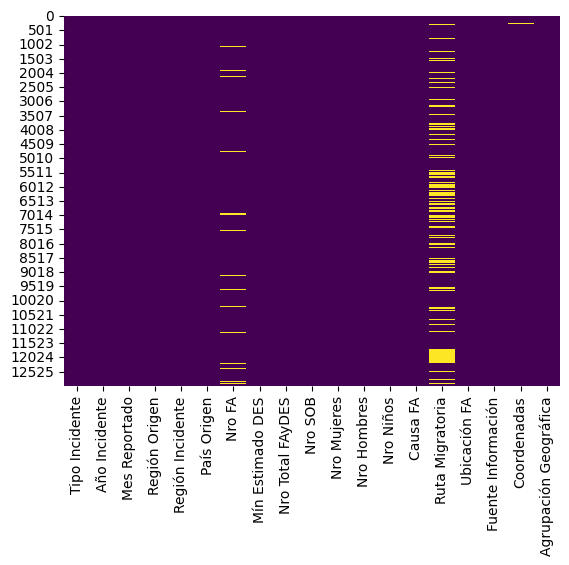

In [43]:
# Visualizar la distribución de datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [44]:
# Determinamos Cantidad de valores Nulos por cada Columna y su porcentaje respecto al Total de columnas
dfNaN = pd.DataFrame({'CantidadNull' : df.isnull().sum(), 'Porcentaje' : ((df.isnull().sum()) / (len(df)) * (100)).round(2) }) 
dfNaN[dfNaN["CantidadNull"]>=1].sort_values(by=["CantidadNull"], ascending=[False])

,CantidadNull,Porcentaje
Ruta Migratoria,3021,23.20
Nro FA,550,4.22
Coordenadas,36,0.28
Región Origen,22,0.17
País Origen,8,0.06
Fuente Información,8,0.06
Agrupación Geográfica,1,0.01


In [45]:
# Eliminamos Atributo que supera el 18% de datos NaN
df = df.drop("Ruta Migratoria", axis=1)  # Elimina columna 
# Ahora nos queda 18 columnas después de eliminar
df.shape

(13020, 18)

Dado que los valores nulos que quedan son pocos (menos del 5% por columna), se opta por: Imputación de Valores Nulos

Ventajas:

Preserva todas las observaciones.

Reduce el sesgo introducido por datos faltantes.

In [46]:
# Revisamos Frecuencia de datos Categoricos
df.describe(include = 'object').T

,count,unique,top,freq
Tipo Incidente,13020,4,Incident,12670
Mes Reportado,13020,12,June,1269
Región Origen,12998,33,Latin America / Caribbean (P),2164
Región Incidente,13020,16,North America,2706
País Origen,13012,335,Unknown,7220
Causa FA,13020,15,Drowning,3313
Ubicación FA,13020,7460,Pima Country Office of the Medical Examiner ju...,1061
Fuente Información,13012,3803,IOM Afghanistan,1538
Coordenadas,12984,9582,"30.96704016, 61.82069052",200
Agrupación Geográfica,13019,19,Northern America,2708


In [47]:
# Asignamos valores por defecto para llenar los datos NaN
df['Región Origen']  = df['Región Origen'].fillna('Unknown')
df['Nro FA']    = df['Nro FA'].fillna(0)
df['País Origen'] = df['País Origen'].fillna('Unknown')
df['Fuente Información']   = df['Fuente Información'].fillna('Unknown')
df['Coordenadas']   = df['Coordenadas'].fillna('00.0000,00.0000')
df['Agrupación Geográfica']   = df['Agrupación Geográfica'].fillna('Unknown')

In [48]:
# Veamos si quedan nulos
df.isnull().sum()

Tipo Incidente           0
Año Incidente            0
Mes Reportado            0
Región Origen            0
Región Incidente         0
País Origen              0
Nro FA                   0
Mín Estimado DES         0
Nro Total FAyDES         0
Nro SOB                  0
Nro Mujeres              0
Nro Hombres              0
Nro Niños                0
Causa FA                 0
Ubicación FA             0
Fuente Información       0
Coordenadas              0
Agrupación Geográfica    0
dtype: int64

<span style="color:yellow">Corrección de Errores: Rectificación de datos incorrectos o inconsistentes.</span>

In [49]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'grey'}).format(precision=2)

,count,mean,std,min,25%,50%,75%,max
Año Incidente,13020.00,2019.06,2.42,2014.00,2017.00,2019.00,2021.00,2023.00
Nro FA,13020.00,2.51,9.54,0.00,1.00,1.00,2.00,750.00
Mín Estimado DES,13020.00,1.90,15.65,-2.00,0.00,0.00,0.00,750.00
Nro Total FAyDES,13020.00,4.42,19.95,1.00,1.00,1.00,2.00,1022.00
Nro SOB,13020.00,6.55,42.32,-2.00,0.00,0.00,0.00,1950.00
Nro Mujeres,13020.00,0.46,2.85,0.00,0.00,0.00,0.00,94.00
Nro Hombres,13020.00,1.12,3.81,0.00,0.00,1.00,1.00,135.00
Nro Niños,13020.00,0.24,2.42,0.00,0.00,0.00,0.00,250.00


In [50]:
# Se observa que hay valores minimos negativos en campos: "Mín Estimado DES" y en "Nro SOB"
# Filtramos por estos casos donde hay negativos
df[(df["Mín Estimado DES"] < 0) | (df["Nro SOB"] < 0) ]

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ubicación FA,Fuente Información,Coordenadas,Agrupación Geográfica
601,Cumulative Incident,2015,August,Central America,Central America,Unknown,20.0,-1,19,1,0,1,1,Mixed or unknown,"State of Puebla, Mexico",El Popular,"18.082037, -97.920056",Central America
806,Split Incident,2015,October,Western Asia,Mediterranean,"Afghanistan,Syrian Arab Republic,Unknown",15.0,-2,13,0,6,3,6,"Drowning,Mixed or unknown","Found on the coast of Lesvos,Off the coast of ...",Hurriyet Daily News,"39.4162, 26.4074",Uncategorized
858,Split Incident,2015,October,Western / Southern Asia (P),Mediterranean,Unknown,57.0,-1,56,274,7,17,20,Drowning,"Found on beaches in Lesvos,north of Lesvos, Gr...",Hellenic Coast Guard,"39.3856462, 26.216722",Uncategorized
1247,Split Incident,2016,February,Sub-Saharan Africa (P),Northern Africa,Unknown,1.0,56,57,-1,0,1,0,"Drowning,Harsh environmental conditions / lack...","Between Dakhla, Western Sahara and Gran Canari...",Asociación Pro Derechos Humanos de Andalucía,"26.9455294, -15.5943805",Uncategorized
7794,Incident,2020,September,Southern Asia,South-eastern Asia,Myanmar,1.0,0,1,-1,1,0,0,Sickness / lack of access to adequate healthcare,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia
7796,Incident,2020,September,Southern Asia,South-eastern Asia,Myanmar,1.0,0,1,-1,0,1,0,Sickness / lack of access to adequate healthcare,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia
7800,Incident,2020,September,Southern Asia,South-eastern Asia,Myanmar,1.0,0,1,-1,1,0,0,Sickness / lack of access to adequate healthcare,"In Lhoksemawe hospital, Aceh province, Indones...","EFE, UNHCR","5.1811638, 97.1413222",South-eastern Asia
7889,Incident,2020,October,Sub-Saharan Africa (P),Northern Africa,Unknown,2.0,0,2,-2,0,2,0,Harsh environmental conditions / lack of adequ...,"In a hospital in Las Palmas, Spain - Rescued t...","El Diario, Txema Santana","28.1008837, -15.4653897",Uncategorized
10422,Incident,2022,March,Unknown,Mediterranean,"Egypt,Unknown",2.0,-1,1,0,0,2,0,Drowning,"Remains washed ashore at Surman beach, Libya",IOM Libya,"32.79560599, 12.583315",Uncategorized


In [51]:
# Generamos una lista que tendrá el indice de filas con valores negativos a corregir
listIndex = df.index[ (df["Mín Estimado DES"] < 0) | (df["Nro SOB"] < 0)].tolist()
listIndex

[601, 806, 858, 1247, 7794, 7796, 7800, 7889, 10422]

In [52]:
# Probamos filtrando uno de los campos a corregir para 2 filas afectadas (identificados por su indice)
df[ ["Mín Estimado DES"] ].loc[[601, 806]]

,Mín Estimado DES
601,-1
806,-2


In [53]:
# Los valores de las 2 columnas con valores negativos los reemplazamos con 0, en caso contrario se mantiene el valor.
df["Mín Estimado DES"] = np.where( (df["Mín Estimado DES"] < 0), 0, df["Mín Estimado DES"] )
df["Nro SOB"] = np.where( (df["Nro SOB"] < 0), 0, df["Nro SOB"] )

# Revisamos columnas actualizadas x filas filtradas por lista de indices definida anteriormente
df[ ["Mín Estimado DES","Nro SOB"] ].loc[listIndex]

,Mín Estimado DES,Nro SOB
601,0,1
806,0,0
858,0,274
1247,56,0
7794,0,0
7796,0,0
7800,0,0
7889,0,0
10422,0,0


In [54]:
# Ahora ya no hay valores negativos como mínimos
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'grey'}).format(precision=2)

,count,mean,std,min,25%,50%,75%,max
Año Incidente,13020.00,2019.06,2.42,2014.00,2017.00,2019.00,2021.00,2023.00
Nro FA,13020.00,2.51,9.54,0.00,1.00,1.00,2.00,750.00
Mín Estimado DES,13020.00,1.90,15.65,0.00,0.00,0.00,0.00,750.00
Nro Total FAyDES,13020.00,4.42,19.95,1.00,1.00,1.00,2.00,1022.00
Nro SOB,13020.00,6.55,42.32,0.00,0.00,0.00,0.00,1950.00
Nro Mujeres,13020.00,0.46,2.85,0.00,0.00,0.00,0.00,94.00
Nro Hombres,13020.00,1.12,3.81,0.00,0.00,1.00,1.00,135.00
Nro Niños,13020.00,0.24,2.42,0.00,0.00,0.00,0.00,250.00


<span style="color:yellow">Deduplicación: Eliminación de registros duplicados para asegurar que cada entrada sea única.</span>

Importancia de la Deduplicación

Mejora la Calidad de los Datos: Garantiza que cada registro sea único y relevante.

Reduce el Sesgo: Evita que las duplicaciones influyan en los resultados del análisis.

Optimiza el Rendimiento: Minimiza el almacenamiento y el tiempo de procesamiento necesario.

In [55]:
# Contamos filas duplicadas
df[df.duplicated(keep='first')].shape[0]

641

In [56]:
# Mostramos algunas filas duplicadas
df[df.duplicated(keep='first')].head(6)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ubicación FA,Fuente Información,Coordenadas,Agrupación Geográfica
222,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
223,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
224,Incident,2014,October,Eastern Africa,Eastern Africa,Unknown,1.0,0,1,0,0,1,0,Drowning,Between Bosaso and Yemen (Bin Sinaa),SHS,"12.5331, 48",Uncategorized
263,Incident,2014,June,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America
270,Incident,2014,October,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America
271,Incident,2014,October,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"00.0000,00.0000",Northern America


In [57]:
# Borramos filas duplicadas y contamos cuantas quedaron
df.drop_duplicates(keep='first', inplace=True)
len(df)

12379

In [58]:
# Antes de continuar respaldamos el Dataframe obtenido hasta acá. Sin valores negativos y sin filas duplicadas
# Esto por si se requiere volver a utilizar más adelante.
df_bkp1 = df


### <span style="color:orange">Selección de Características I (feature selection)<span>


In [59]:
# Revisamos Frecuencia de datos Categoricos
df.describe(include = 'object').T

,count,unique,top,freq
Tipo Incidente,12379,4,Incident,12029
Mes Reportado,12379,12,June,1235
Región Origen,12379,33,Latin America / Caribbean (P),2117
Región Incidente,12379,16,North America,2673
País Origen,12379,335,Unknown,7042
Causa FA,12379,15,Drowning,3293
Ubicación FA,12379,7460,Pima Country Office of the Medical Examiner ju...,1036
Fuente Información,12379,3804,Pima County Office of the Medical Examiner (PC...,1452
Coordenadas,12379,9583,"35.68940913, 51.38958967",31
Agrupación Geográfica,12379,20,Northern America,2675


In [60]:
 df['Tipo Incidente'].value_counts(sort=True)  

Tipo Incidente
Incident                   12029
Split Incident               261
Cumulative Incident           84
Incident,Split Incident        5
Name: count, dtype: int64

#### <span style="color:magenta">Pregunta 1 : ¿Cuál es la principal Causa de Muerte por cada Agrupación Geográfica? <span>

In [61]:
# Para responder esto primero revisamos la frecuencia de columna: Causa FA 
df['Causa FA'].value_counts(sort=True)  


Causa FA
Drowning                                                                                                                   3293
Mixed or unknown                                                                                                           3083
Vehicle accident / death linked to hazardous transport                                                                     1934
Harsh environmental conditions / lack of adequate shelter, food, water                                                     1350
Violence                                                                                                                   1277
Sickness / lack of access to adequate healthcare                                                                           1132
Accidental death                                                                                                            289
Drowning,Harsh environmental conditions / lack of adequate shelter, food, water                

#### <span style="color:magenta"> Se observa que hay Causas de Fallecimiento con frecuencia muy baja (entre 1 y 8)  Podríamos agrupar estos casos de baja frecuencia en una categoría genérica, por ejemplo: 'Others'   Pero aun así quedaría esta nueva categoría con un porcentaje muy bajo respecto a la frecuencia de las otras Causas de Fallecimiento. Por lo tanto, como son pocos casos, se procederá no considerar estas filas. <span>

In [62]:
# df = df_bkp1

In [63]:
# Revisamos la frecuencia de columna: Agrupación Geográfica
df['Agrupación Geográfica'].value_counts(sort=True)  

Agrupación Geográfica
Northern America      2675
Uncategorized         2335
Northern Africa       1794
Central America       1342
Southern Asia         1218
Western Africa         910
Eastern Africa         455
Western Asia           385
Southern Europe        329
South-eastern Asia     224
South America          206
Western Europe         156
Caribbean              113
Eastern Europe         109
Middle Africa           74
Northern Europe         25
Eastern Asia            15
Southern Africa         12
Central Asia             1
Unknown                  1
Name: count, dtype: int64

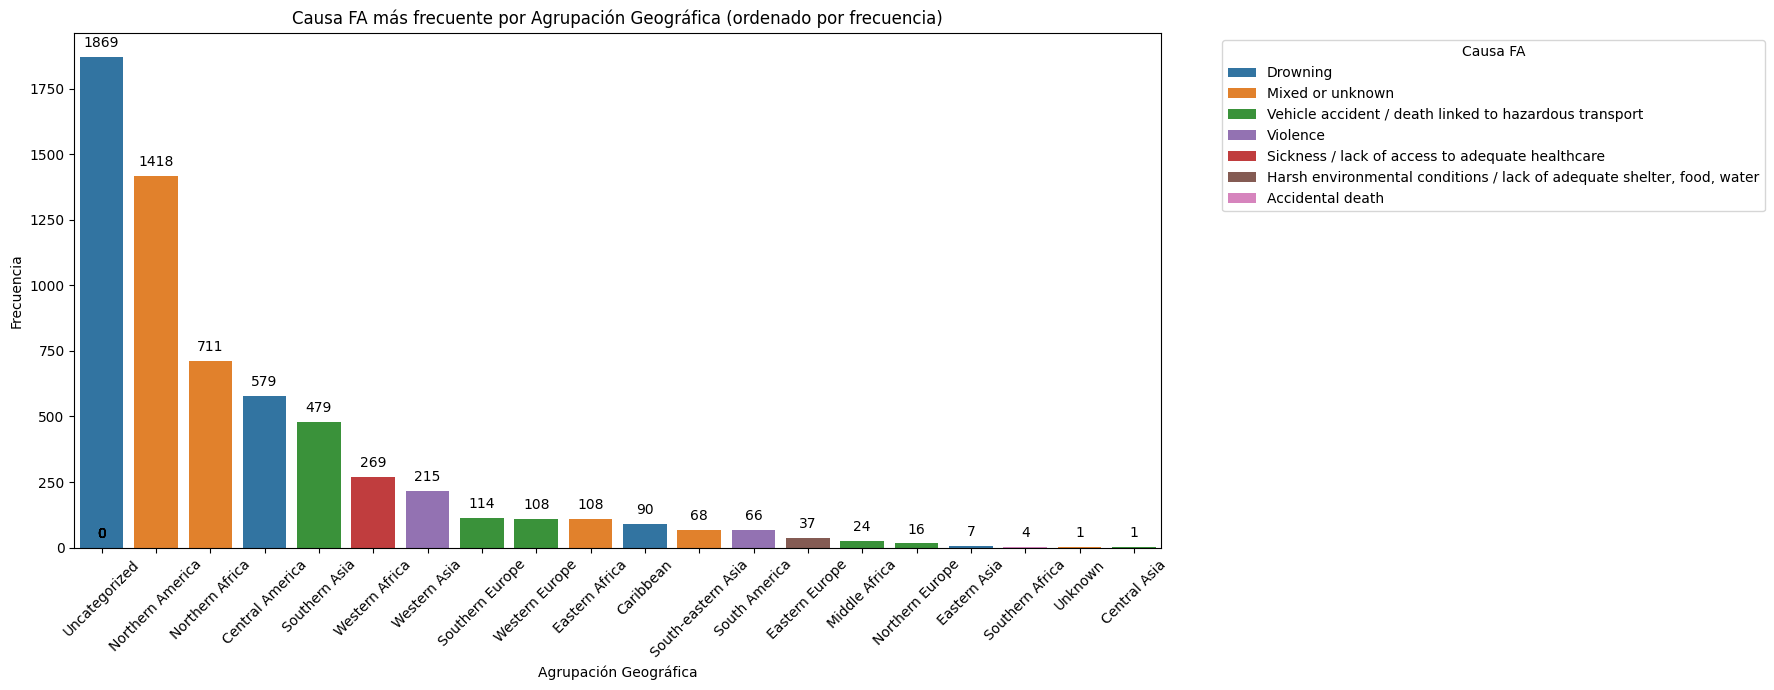

In [64]:
# Calcular las frecuencias
frecuencias = df.groupby(['Agrupación Geográfica', 'Causa FA'], observed=True).size().reset_index(name='Frecuencia')

# Eliminar las filas donde la frecuencia sea < 74
#frecuencias = frecuencias[frecuencias['Frecuencia'] > 7]

# Encontrar la causa más frecuente por agrupación geográfica
max_frecuencias = frecuencias.loc[frecuencias.groupby('Agrupación Geográfica', observed=True)['Frecuencia'].idxmax()]

# Ordenar por frecuencia de mayor a menor
max_frecuencias = max_frecuencias.sort_values(by='Frecuencia', ascending=False)
max_frecuencias

# Definir el orden de las categorías geográficas basado en la frecuencia
orden_geografico = max_frecuencias['Agrupación Geográfica']


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Agrupación Geográfica', y='Frecuencia', hue='Causa FA', data=max_frecuencias, order=orden_geografico, dodge=False)

# Añadir etiquetas de frecuencia
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')



# Ajustar el orden de la leyenda para que coincida con las barras ordenadas
handles, labels = ax.get_legend_handles_labels()
frecuencias_causa = max_frecuencias.groupby('Causa FA')['Frecuencia'].sum().sort_values(ascending=False)
labels_ordenadas = [label for label in frecuencias_causa.index if label in labels]
handles_ordenadas = [handles[labels.index(label)] for label in labels_ordenadas]
ax.legend(handles=handles_ordenadas, labels=labels_ordenadas, title='Causa FA', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Causa FA más frecuente por Agrupación Geográfica (ordenado por frecuencia)')
plt.xlabel('Agrupación Geográfica')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style="color:orange">Transformación de Datos<span>

<span style="color:yellow">Conversión de Tipos de Datos: Cambiar el tipo de datos de las variables para adecuarlas a los requisitos del análisis.<span>

Importancia de la Conversión de Tipos de Datos

Compatibilidad: Asegura que los datos sean compatibles con las funciones y métodos utilizados en el análisis y modelado.

Eficiencia: Optimiza el uso de memoria y mejora la velocidad de procesamiento.

Exactitud: Previene errores y asegura que las operaciones se realicen correctamente sobre los tipos de datos adecuados.

In [65]:
# Revisamos tipos de datos
df.dtypes

Tipo Incidente            object
Año Incidente              int64
Mes Reportado             object
Región Origen             object
Región Incidente          object
País Origen               object
Nro FA                   float64
Mín Estimado DES           int64
Nro Total FAyDES           int64
Nro SOB                    int64
Nro Mujeres                int64
Nro Hombres                int64
Nro Niños                  int64
Causa FA                  object
Ubicación FA              object
Fuente Información        object
Coordenadas               object
Agrupación Geográfica     object
dtype: object

Transformar columnas de tipo object a category en un DataFrame de pandas tiene varios beneficios:

Reducción significativa del uso de memoria.
Mejora en el rendimiento de las operaciones.
Gestión más eficiente de las variables categóricas, incluyendo ordenación y comparaciones.
Preparación más fácil y eficaz para análisis y modelado de machine learning.
Esta transformación es especialmente recomendable cuando se trabaja con grandes conjuntos de datos que contienen muchas variables categóricas con un número limitado de categorías únicas.

In [66]:
# Transformamos columnas object a category
columnas_object = df.select_dtypes(include=['object']).columns
print("Transforma columnas object..")
for i, colum in enumerate(columnas_object):				
    print(colum)
    df[colum] = df[colum].astype('category')

Transforma columnas object..
Tipo Incidente
Mes Reportado
Región Origen
Región Incidente
País Origen
Causa FA
Ubicación FA
Fuente Información
Coordenadas
Agrupación Geográfica


In [67]:
df.dtypes

Tipo Incidente           category
Año Incidente               int64
Mes Reportado            category
Región Origen            category
Región Incidente         category
País Origen              category
Nro FA                    float64
Mín Estimado DES            int64
Nro Total FAyDES            int64
Nro SOB                     int64
Nro Mujeres                 int64
Nro Hombres                 int64
Nro Niños                   int64
Causa FA                 category
Ubicación FA             category
Fuente Información       category
Coordenadas              category
Agrupación Geográfica    category
dtype: object

Vemos que la variable: "Nro FA" es del tipo float64, la cual permite almacenar decimales, sin embargo, solo está almacenando enteros. 

Por lo tanto, vamos a cambiar el tipo de dato a int64 ya que es más Optimo:
Las variables de tipo int64 ocupan menos memoria que las de tipo float64.
Algunos algoritmos de machine learning pueden requerir o preferir datos en formato entero en lugar de flotante, especialmente si los valores representan categorías discretas o conteos en lugar de medidas continuas.


In [68]:
# Cambiamos el tipo de dato de float64 a int64 para 'Nro FA'
df["Nro FA"] = df["Nro FA"].astype('int64')

In [69]:
# Revisamos como queda finalmente
df.dtypes

Tipo Incidente           category
Año Incidente               int64
Mes Reportado            category
Región Origen            category
Región Incidente         category
País Origen              category
Nro FA                      int64
Mín Estimado DES            int64
Nro Total FAyDES            int64
Nro SOB                     int64
Nro Mujeres                 int64
Nro Hombres                 int64
Nro Niños                   int64
Causa FA                 category
Ubicación FA             category
Fuente Información       category
Coordenadas              category
Agrupación Geográfica    category
dtype: object

### <span style="color:orange">Gráficos de Variables Categóricas<span>

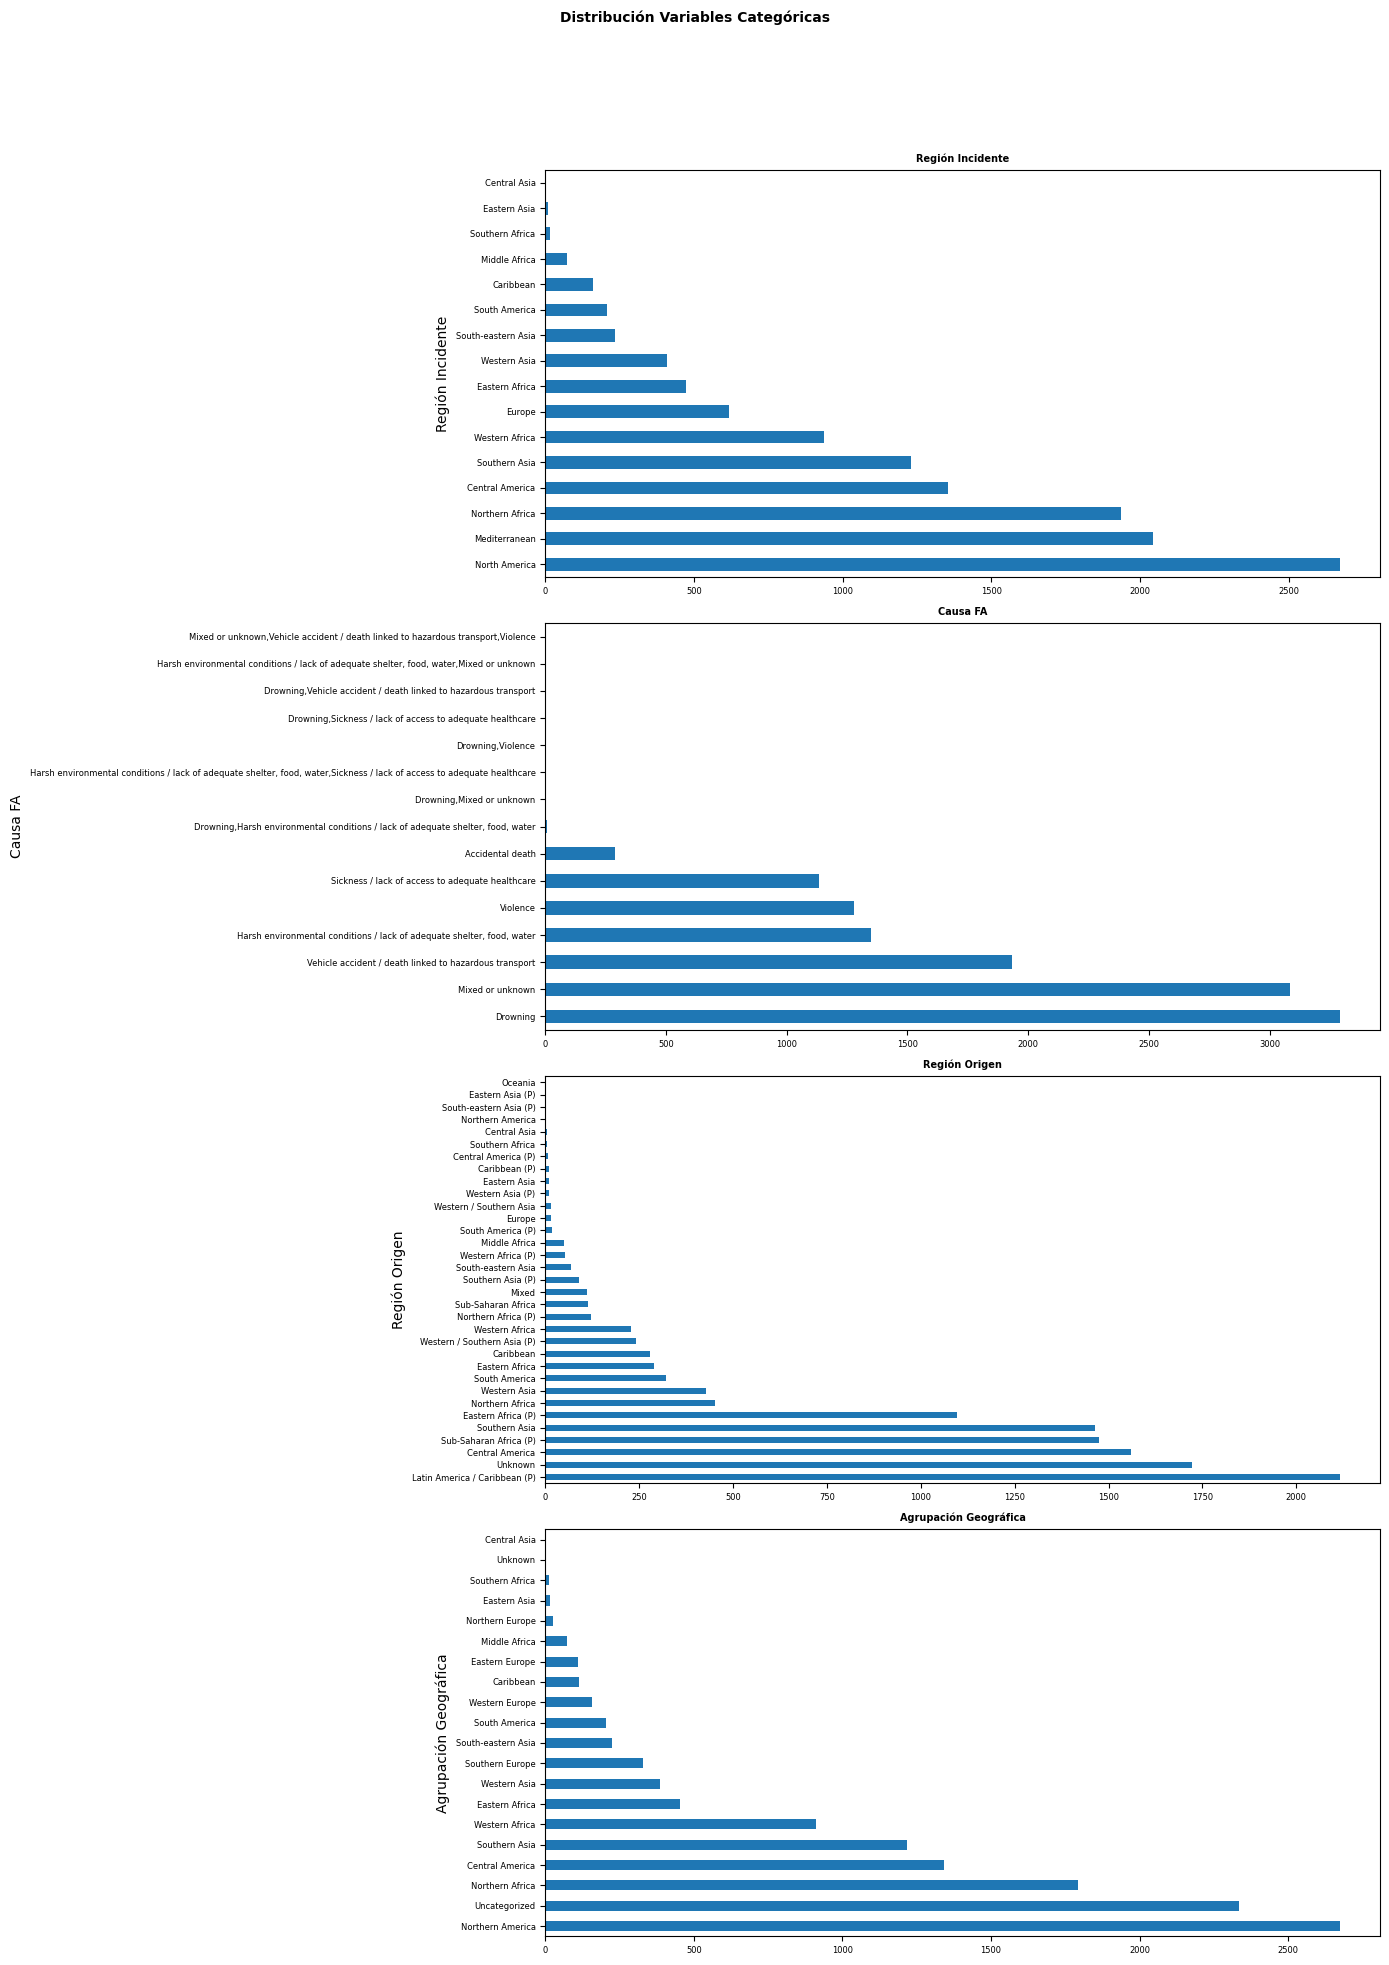

In [70]:
# Gráfico para dos variables Categóricas
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))
axes = axes.flat
columnas_object = ['Región Incidente', 'Causa FA','Región Origen','Agrupación Geográfica']
       
for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución Variables Categóricas',  fontsize = 10, fontweight = "bold");

In [71]:
# Revisamos estadística de datos numéricos
df.describe(include = 'int64').T

,count,mean,std,min,25%,50%,75%,max
Año Incidente,12379.0,2019.023184,2.431388,2014.0,2017.0,2019.0,2021.0,2023.0
Nro FA,12379.0,2.581469,9.766322,0.0,1.0,1.0,2.0,750.0
Mín Estimado DES,12379.0,2.000646,16.039024,0.0,0.0,0.0,0.0,750.0
Nro Total FAyDES,12379.0,4.581711,20.443476,1.0,1.0,1.0,2.0,1022.0
Nro SOB,12379.0,6.893610,43.370229,0.0,0.0,0.0,0.0,1950.0
Nro Mujeres,12379.0,0.478310,2.924550,0.0,0.0,0.0,0.0,94.0
Nro Hombres,12379.0,1.128686,3.906836,0.0,0.0,1.0,1.0,135.0
Nro Niños,12379.0,0.248728,2.478167,0.0,0.0,0.0,0.0,250.0


In [72]:
df.shape

(12379, 18)

#### Analisis de variables numéricas

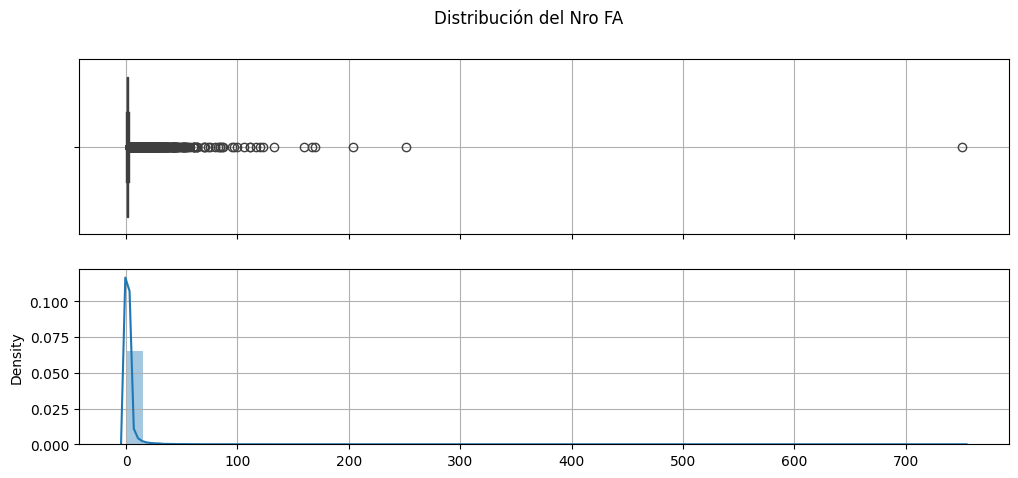

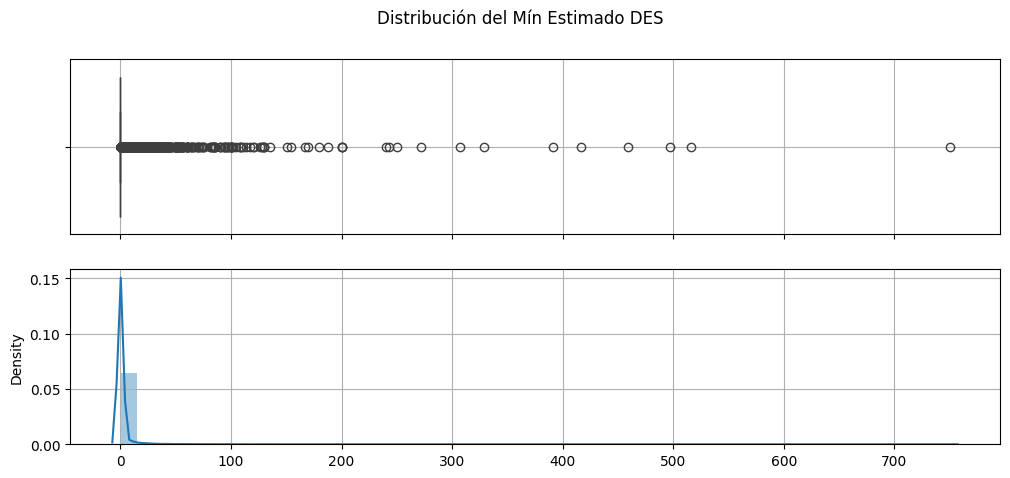

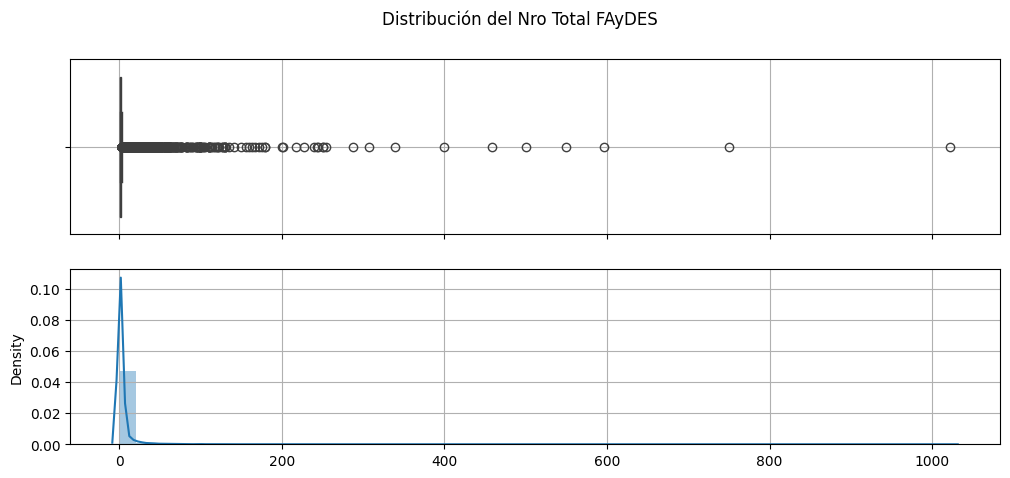

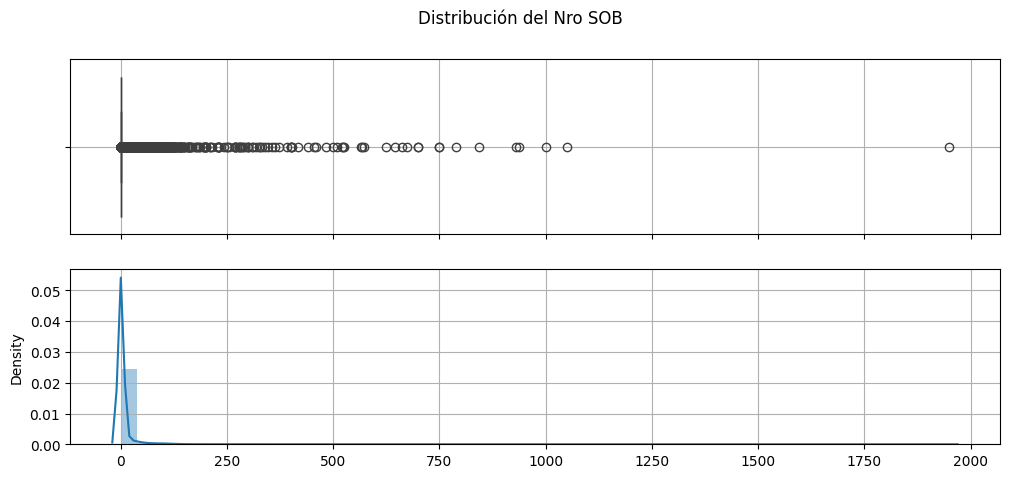

In [73]:
numerical_features = ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOB']
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
    fig.suptitle(f'Distribución del {feature}')
    sns.boxplot(x = df[feature], ax = axes[0])
    sns.distplot(x = df[feature], ax = axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.show()

### <span style="color:orange">Detección y Tratamiento de valores atípicos (outliers)<span>

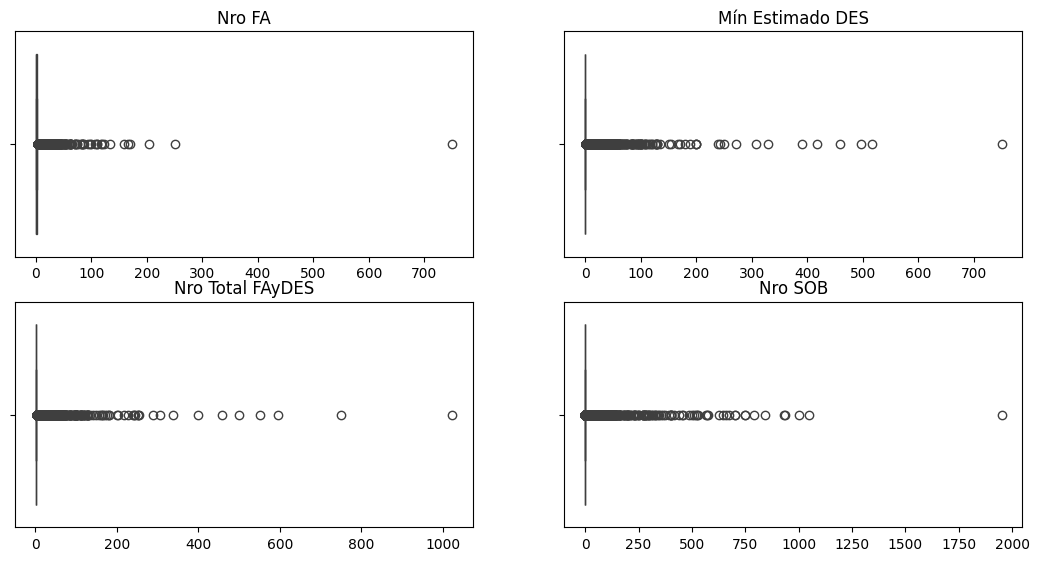

In [74]:
# Funcion que grafica Outliers de columnas numéricas
def Fun_OutliersNumeric(df_name):
    plt.figure(figsize=(13,24))
    for i,j in zip(range(14),['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOB']):
        plt.subplot(7,2,i+1)
        sns.boxplot(x=df_name[j],orient='v')
        plt.title(j)
        plt.xlabel('')

# Invocamos la funcion pasando el dataframe: df
Fun_OutliersNumeric(df)

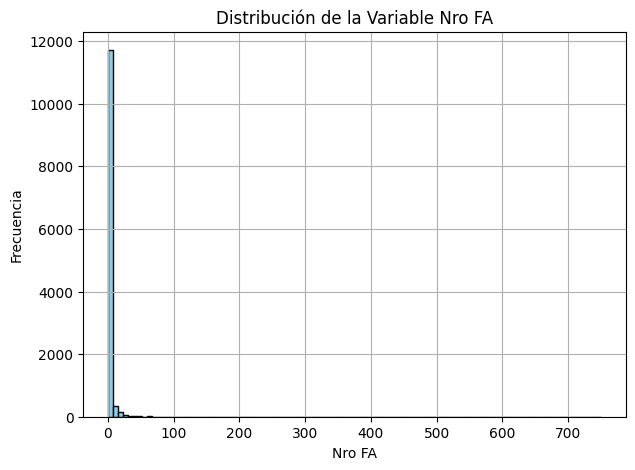

In [75]:
# Funcion que permite ver la distribución de una variable
def Fun_DistribucionVariable(data, variable):
    plt.figure(figsize=(7, 5))
    plt.hist(data[variable], bins=100, color='skyblue', edgecolor='black')
    plt.title('Distribución de la Variable {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Vemos como distribuye la variable : 'Nro de Fallecidos'
Fun_DistribucionVariable(df, 'Nro FA')

Procedemos a disminuir los outliers de columnas numéricas.

Reemplazamos los valores outliers de columnas numéricas por la mediana de cada columna

Para todas las filas donde se encuentre el índice del outliers

In [76]:
outliers_indices = []
for column in ['Nro FA','Mín Estimado DES','Nro Total FAyDES','Nro SOB']:
        print(column)
        z_scores = stats.zscore(df[column])
        outliers_indices.extend(df.index[abs(z_scores) > 3])
        print (df[ [column] ].loc[outliers_indices])

        mediana = np.median(df[column])
        df.loc[outliers_indices, column] = mediana
        print (df[ [column] ].loc[outliers_indices])

Nro FA
       Nro FA
45        251
78         44
94         62
127        45
173       170
...       ...
12550      86
12592      34
12708      50
12790      40
12849      80

[96 rows x 1 columns]
       Nro FA
45          1
78          1
94          1
127         1
173         1
...       ...
12550       1
12592       1
12708       1
12790       1
12849       1

[96 rows x 1 columns]
Mín Estimado DES
       Mín Estimado DES
45                    0
78                   33
94                    0
127                   0
173                  81
...                 ...
10826                70
12454               180
12532                61
12849               516
12886                51

[204 rows x 1 columns]
       Mín Estimado DES
45                    0
78                    0
94                    0
127                   0
173                   0
...                 ...
10826                 0
12454                 0
12532                 0
12849                 0
12886             

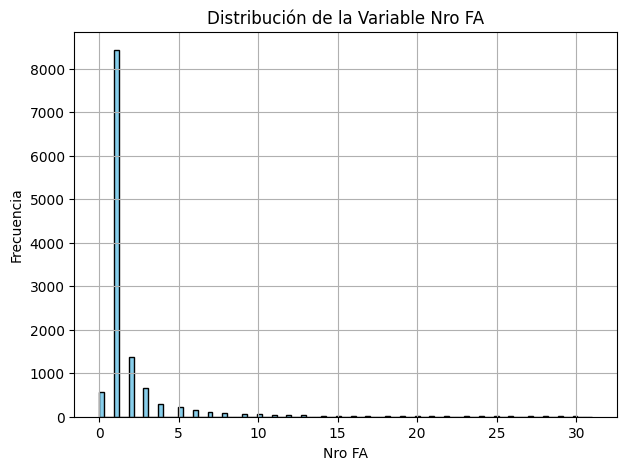

In [77]:
# Ahora vemos como distribuye la variable : Nro de Fallecidos después de bajar los outliers con la media de cada variable
# Llamaos a la misma función..
Fun_DistribucionVariable(df, 'Nro FA')
# Siguen habindo outliers paro no son tan extremos 

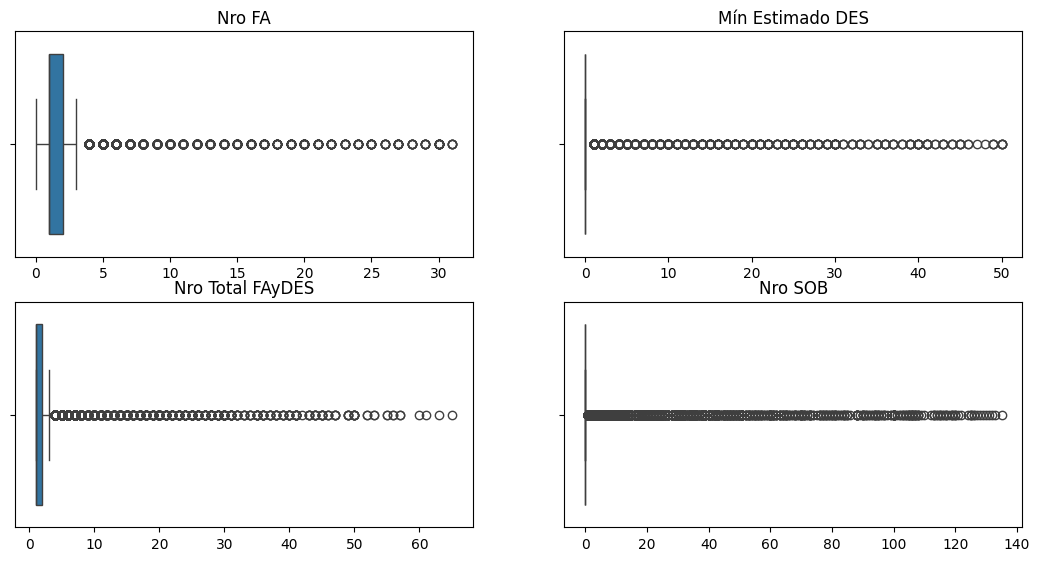

In [78]:
# Volvermos a revisar Outliers de variables numéricas
Fun_OutliersNumeric(df)

### <span style="color:orange">1era Hipótesis : En la región de Norteamérica, debe ser mayor el nro de hombres que el nro de mujeres <span>

In [79]:
df_norteamerica = df[df['Región Incidente']=='North America']
df_norteamerica.head(5)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ubicación FA,Fuente Información,Coordenadas,Agrupación Geográfica
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1,0,1,0,0,1,0,Violence,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America
5,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Violence,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"32.45435, -113.18402",Northern America


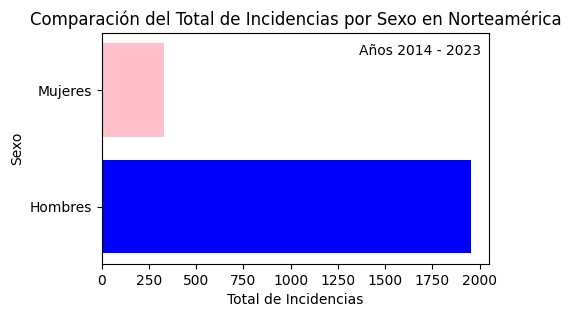

In [80]:
categorias = ['Hombres', 'Mujeres']
tot_incidencias = [df_norteamerica["Nro Hombres"].sum(), df_norteamerica["Nro Mujeres"].sum()]

# Ahora, calculamos los años de inicio y fin
año_inicio = df_norteamerica['Año Incidente'].min()
año_fin = df_norteamerica['Año Incidente'].max()

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(5, 3))

# Agregamos la etiqueta para indicar el rango de años en la parte superior derecha
plt.text(0.98, 0.95, f"Años {año_inicio} - {año_fin}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)

plt.barh(categorias, tot_incidencias, color=['blue', 'pink'])

# Añadimos etiquetas y título
plt.xlabel('Total de Incidencias')
plt.ylabel('Sexo')
plt.title('Comparación del Total de Incidencias por Sexo en Norteamérica')

# Mostramos el gráfico
plt.show()


A través del gráfico se comprueba la hipótesis Nro 1. El total de Hombres es superior al total de mujeres en Norteamérica (por incidencias)

### <span style="color:orange">2da Hipótesis : Para el año 2020, la región de Geográfica de América del Norte podría tener el mayor nro de casos de muertos y desaparecidos.<span>

In [81]:
# Creamos un DataFrame con las variables a estudiar, agrupadas por Zona, Año y totalizada por muertos y desaparecidos
incidentes_x_zona = df.groupby( ['Agrupación Geográfica','Año Incidente'] )['Nro Total FAyDES'].sum().reset_index()

In [82]:
# Eliminamos la grupo-zona Uncategorized y N/A
incidentes_x_zona = incidentes_x_zona.loc[ (incidentes_x_zona['Agrupación Geográfica'] != 'Uncategorized') & (incidentes_x_zona['Agrupación Geográfica'] != 'N/A')]

In [83]:
# Filtramos por año 2020
incidentes_x_zona_2020 = incidentes_x_zona[incidentes_x_zona['Año Incidente'] == 2020]
incidentes_x_zona_2020

,Agrupación Geográfica,Año Incidente,Nro Total FAyDES
6,Caribbean,2020,143
16,Central America,2020,160
26,Central Asia,2020,0
36,Eastern Africa,2020,68
46,Eastern Asia,2020,2
56,Eastern Europe,2020,9
66,Middle Africa,2020,19
76,Northern Africa,2020,125
86,Northern America,2020,365
96,Northern Europe,2020,0


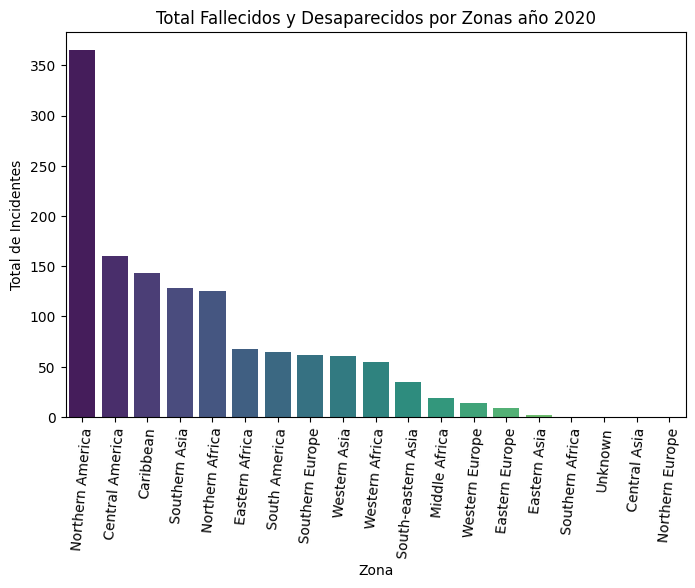

In [84]:
# Graficamos
 
plt.figure(figsize=(8, 5))
orden = incidentes_x_zona_2020.sort_values('Nro Total FAyDES', ascending=False)['Agrupación Geográfica']
sns.barplot(x='Agrupación Geográfica', y='Nro Total FAyDES', data=incidentes_x_zona_2020, order=orden, palette='viridis')
plt.title('Total Fallecidos y Desaparecidos por Zonas año 2020')
plt.xlabel('Zona')
plt.ylabel('Total de Incidentes')
plt.xticks(rotation=85)

plt.show()

Para el año 2020 se cumple la hipótesis nro 2, pero no necesariamente se podría cumplir para otros años.

### <span style="color:orange">Gráfico GeoEspacial<span>

In [85]:
#Separamos coordenadas en Latitud y Longitud
df[['Latitud', 'Longitud']] = df['Coordenadas'].str.split(',', expand=True).astype(float)

In [86]:
df.head(2)

,Tipo Incidente,Año Incidente,Mes Reportado,Región Origen,Región Incidente,País Origen,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños,Causa FA,Ubicación FA,Fuente Información,Coordenadas,Agrupación Geográfica,Latitud,Longitud
0,Incident,2014,January,Central America,North America,Guatemala,1,0,1,0,0,1,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1,0,1,0,0,0,0,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.597130,-111.737560


In [87]:
df = df.drop("Coordenadas", axis=1)  # Elimina columna 

In [88]:
import folium
from folium.plugins import MarkerCluster
import math

In [89]:
#Incializa en cierta posición
map1 = folium.Map(location=[26.0198, 32.2778], tiles='cartodbpositron', zoom_start=3, control_scale=True ) 


mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Longitud']) and not math.isnan(row['Latitud']):
        mc.add_child(folium.Marker([row['Latitud'], row['Longitud']]))
map1.add_child(mc)
map1

KeyboardInterrupt: 

### <span style="color:orange">Transformación de Box-Cox (corrección de asimetrías)<span>

La corrección de asimetrías en variables numéricas es una técnica importante en la preparación de datos para el análisis estadístico y el modelado de machine learning. Una de las técnicas más comunes para corregir la asimetría (o sesgo) es la transformación logarítmica. Esta técnica se utiliza para reducir la asimetría de una distribución, haciendo que sea más parecida a una distribución normal.


In [92]:
# Generamos nuevo dataframe con solo variables numéricas
df_int   = df.select_dtypes(include=['int64'])
df_int.columns

Index(['Año Incidente', 'Nro FA', 'Mín Estimado DES', 'Nro Total FAyDES',
       'Nro SOB', 'Nro Mujeres', 'Nro Hombres', 'Nro Niños'],
      dtype='object')

In [ ]:
# Generamos nuevo dataframe (df_ln) con el logaritimo de cada columna
ListCols_ln =[]
df_ln = pd.DataFrame()
for col in (df_int.columns):
    new_col= 'ln_'+col
    df_ln[new_col] = np.log(df[col]+1).astype('int64')

df_ln.columns

Index(['ln_Año Incidente', 'ln_Nro FA', 'ln_Mín Estimado DES',
       'ln_Nro Total FAyDES', 'ln_Nro SOB', 'ln_Nro Mujeres', 'ln_Nro Hombres',
       'ln_Nro Niños'],
      dtype='object')

In [ ]:
# Definimos una función para graficar la Distribución de las variables numéricas
def Fn_Distribucion(Nrows, Ncols, Data, ListaColumnas, NameDf) :

    fig, axes = plt.subplots(nrows=Nrows, ncols=Ncols, figsize=(10, 6))
    axes = axes.flat

    for i, colum in enumerate(ListaColumnas):
        sns.histplot(
            data     = Data,
            x        = colum,
            stat     = "density",
            kde      = True,
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws = {'linewidth': 2},
            alpha    = 0.3,
            ax       = axes[i]
        )
        axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
        axes[i].tick_params(labelsize = 6)
        axes[i].set_xlabel("")


    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Distribución variables numéricas en : '+NameDf, fontsize = 10,
                            fontweight = "bold");

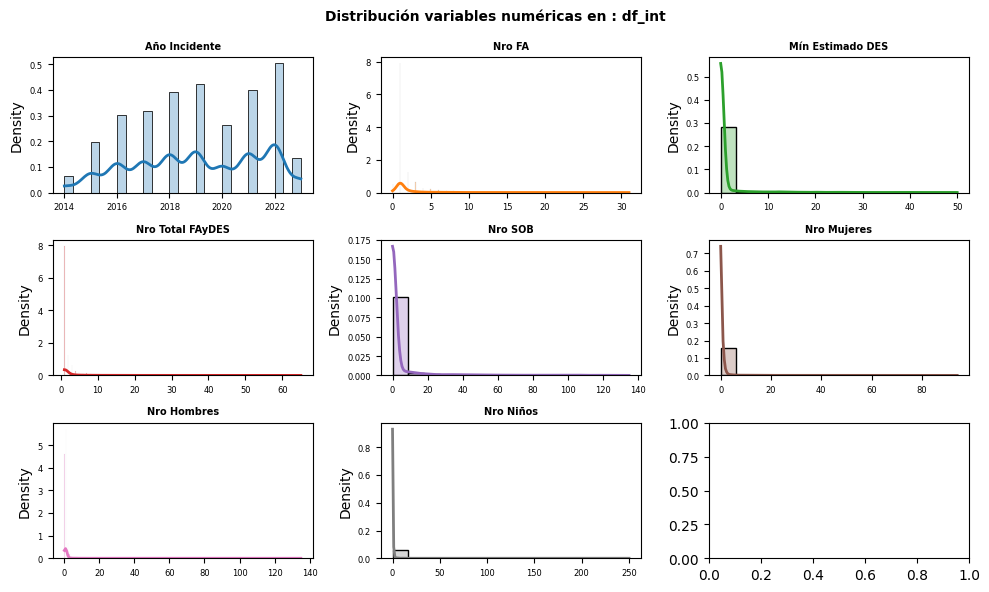

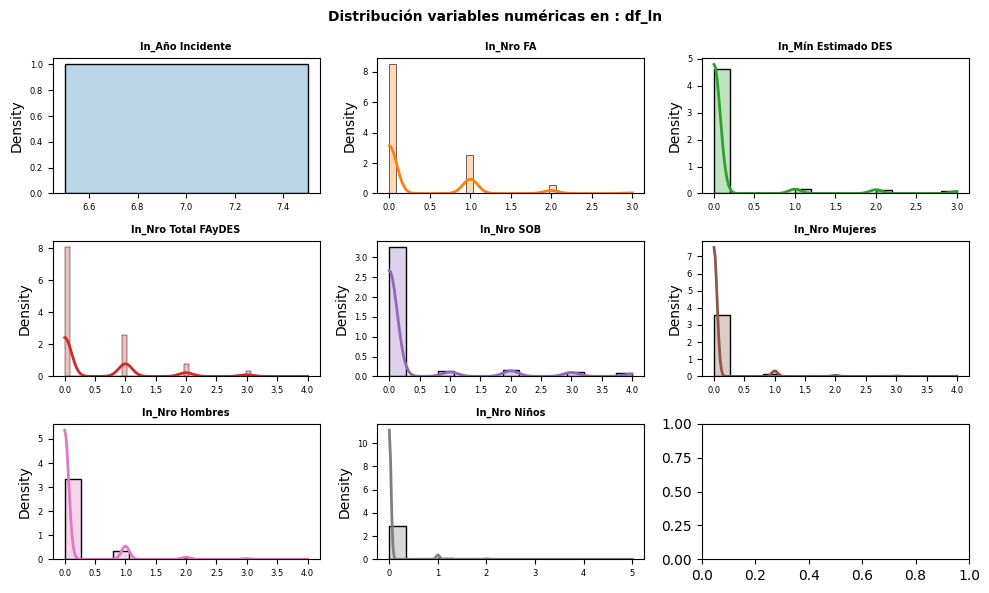

In [ ]:
# Graficamos ambos Dataframes y comparamos las distribuciones resultantes
Fn_Distribucion(3, 3, df_int, df_int.columns.tolist(), 'df_int' )
Fn_Distribucion(3, 3, df_ln, df_ln.columns.tolist(), 'df_ln' )


#### Conclusión: Vemos que cambia la escala pero no mucho la distribución, por lo tanto, se decarta seguir usando el Dataframe : df_ln
No se aplicará modificación de asimetrías.


### <span style="color:orange">Selección de Características II (feature selection)<span>

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos.

### Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de los datos, las que tiene variabilidad 0 o muy cercana 0.
Esto puede ser útil para mejorar la eficacia de los modelos de ML y reducir el tiempo de entrenamiento al eliminar información redundante.

In [93]:
df_int.std()

Año Incidente        2.431388
Nro FA               3.200500
Mín Estimado DES     4.318779
Nro Total FAyDES     5.603920
Nro SOB             13.815955
Nro Mujeres          2.924550
Nro Hombres          3.906836
Nro Niños            2.478167
dtype: float64

In [94]:
df_int.corr().style.format(precision=2)

,Año Incidente,Nro FA,Mín Estimado DES,Nro Total FAyDES,Nro SOB,Nro Mujeres,Nro Hombres,Nro Niños
Año Incidente,1.00,-0.09,0.03,-0.03,0.05,-0.01,0.03,-0.03
Nro FA,-0.09,1.00,0.11,0.63,0.16,0.13,0.14,0.08
Mín Estimado DES,0.03,0.11,1.00,0.83,0.23,0.11,0.14,0.06
Nro Total FAyDES,-0.03,0.63,0.83,1.00,0.26,0.15,0.19,0.09
Nro SOB,0.05,0.16,0.23,0.26,1.00,0.03,0.06,0.03
Nro Mujeres,-0.01,0.13,0.11,0.15,0.03,1.00,0.22,0.12
Nro Hombres,0.03,0.14,0.14,0.19,0.06,0.22,1.00,0.06
Nro Niños,-0.03,0.08,0.06,0.09,0.03,0.12,0.06,1.00


No se observa atributos con una desviación estándar muy pequeña (0 - 0.1), por lo tanto, mantendremos las columnas por este criterio

### <span style="color:orange">Matriz de Correlación<span>

<Axes: >

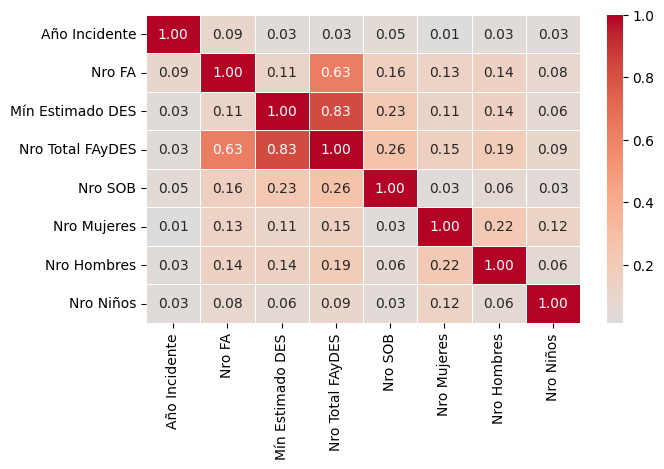

In [ ]:
corr_mat = df_int.corr(method='pearson').abs()
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_mat, annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm', center=0)

In [ ]:
print('Las 5 columnas más correlacionadas positivamente con: Nro Total FAyDES')
corr_mat['Nro Total FAyDES'].sort_values(ascending=False).head(5).round(2)

Las 5 columnas más correlacionadas positivamente con: Nro Total FAyDES


Nro Total FAyDES    1.00
Mín Estimado DES    0.83
Nro FA              0.63
Nro SOB             0.26
Nro Hombres         0.19
Name: Nro Total FAyDES, dtype: float64

No se distingue 2 o más variables muy correlacionadas, con "Nro Total FAyDES", como para eliminar alguna de ellas. 

Tenemos 0.63 y 0.83 (no son muy cercanos estos valores)

Por lo tanto, nos quedamos con todas las variables numéricas sin eliminar ninguna de ellas.

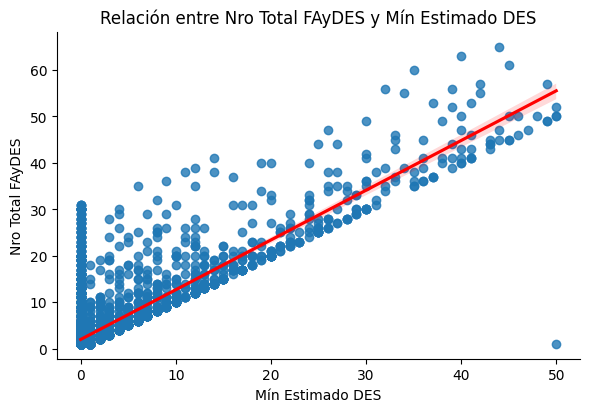

In [ ]:
sns.lmplot(data=df, x='Mín Estimado DES', y='Nro Total FAyDES', line_kws={'color': 'r'}, height=4, aspect=1.5)
plt.title('Relación entre Nro Total FAyDES y Mín Estimado DES')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

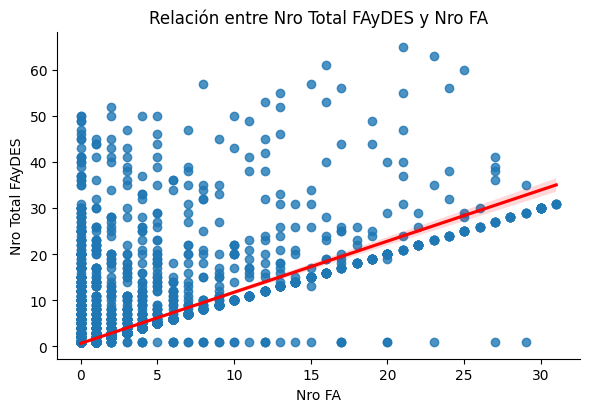

In [ ]:
sns.lmplot(data=df, x='Nro FA', y='Nro Total FAyDES', line_kws={'color': 'r'}, height=4, aspect=1.5)
plt.title('Relación entre Nro Total FAyDES y Nro FA')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

<Axes: xlabel='Mín Estimado DES', ylabel='Nro Total FAyDES'>

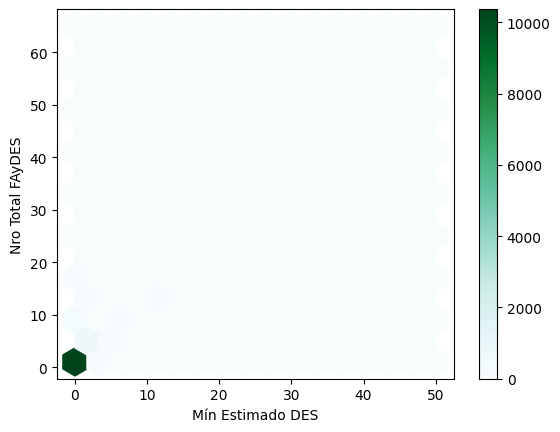

In [ ]:
df.plot.hexbin(x='Mín Estimado DES', y='Nro Total FAyDES', gridsize=15)

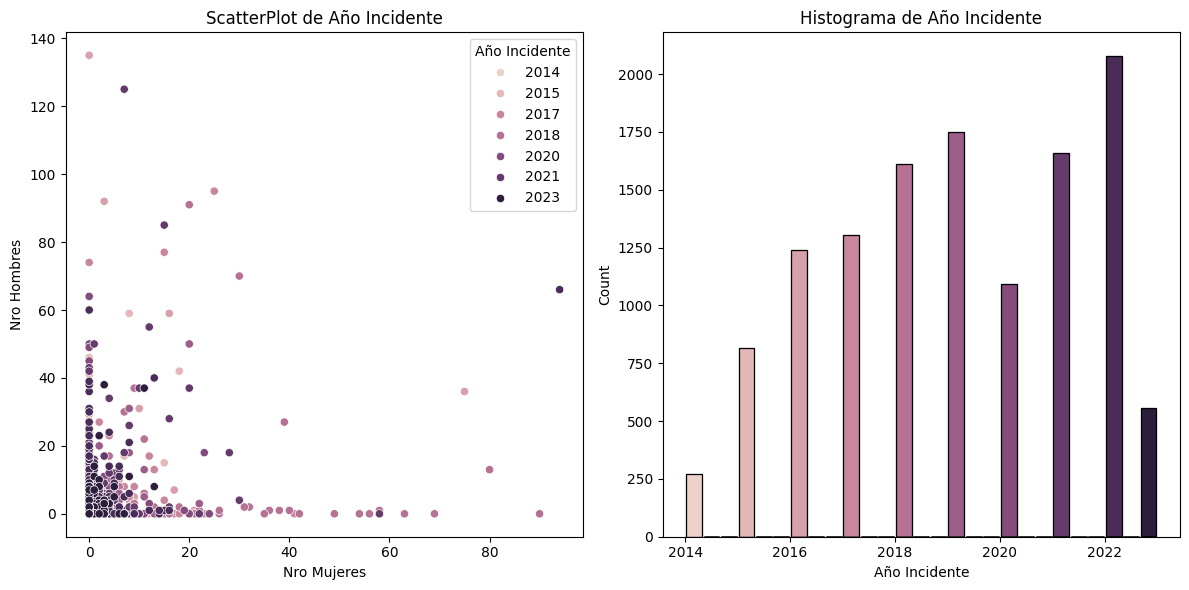

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="Nro Mujeres", y="Nro Hombres", hue="Año Incidente", ax=axs[0])
sns.histplot(data=df, x="Año Incidente", hue="Año Incidente", shrink=.9, alpha=1, legend=False, ax=axs[1])

# Añadir títulos y ajustar el layout
axs[0].set_title('ScatterPlot de Año Incidente')
axs[1].set_title('Histograma de Año Incidente')
plt.tight_layout()
#f.tight_layout()
plt.show()

### <span style="color:orange">Análisis Estadístico de Variables Numéricas <span>
##### <span style="color:white"> ¿Qué tan representativa es la Media de estas variables?<span>

In [ ]:
# Listamos la media de variables numéricas
df.select_dtypes(include='number').mean().round(4)

Año Incidente       2019.0232
Nro FA                 2.0447
Mín Estimado DES       0.8993
Nro Total FAyDES       2.9151
Nro SOB                3.4636
Nro Mujeres            0.4783
Nro Hombres            1.1287
Nro Niños              0.2487
Latitud               27.0652
Longitud             -19.4659
dtype: float64

In [ ]:
# Creamos un DataFrame con el Coeficiente de Variación de variables numéricas
df_cv= df.select_dtypes(include='number').agg(lambda x: x.std() / x.mean(skipna=True) ).rename('Coeficiene Variación').round(2).reset_index()
df_cv.rename(columns={'index': 'Nom_Variable'}, inplace=True)
df_cv

,Nom_Variable,Coeficiene Variación
0,Año Incidente,0.00
1,Nro FA,1.57
2,Mín Estimado DES,4.80
3,Nro Total FAyDES,1.92
4,Nro SOB,3.99
5,Nro Mujeres,6.11
6,Nro Hombres,3.46
7,Nro Niños,9.96
8,Latitud,0.43
9,Longitud,-3.33


In [ ]:
# Creamos un DataFrame con la Media de variables numéricas
df_media = df.select_dtypes(include='number').agg(lambda x: x.mean(skipna=True) ).rename('Media').round(4).reset_index()
df_media.rename(columns={'index': 'Nom_Variable'}, inplace=True)
df_media

,Nom_Variable,Media
0,Año Incidente,2019.0232
1,Nro FA,2.0447
2,Mín Estimado DES,0.8993
3,Nro Total FAyDES,2.9151
4,Nro SOB,3.4636
5,Nro Mujeres,0.4783
6,Nro Hombres,1.1287
7,Nro Niños,0.2487
8,Latitud,27.0652
9,Longitud,-19.4659


In [ ]:
# Unimos ambos DataFrame por columna : Nom_Variable
df_merged = pd.merge(df_cv, df_media, on='Nom_Variable', how='inner') 
df_merged

,Nom_Variable,Coeficiene Variación,Media
0,Año Incidente,0.00,2019.0232
1,Nro FA,1.57,2.0447
2,Mín Estimado DES,4.80,0.8993
3,Nro Total FAyDES,1.92,2.9151
4,Nro SOB,3.99,3.4636
5,Nro Mujeres,6.11,0.4783
6,Nro Hombres,3.46,1.1287
7,Nro Niños,9.96,0.2487
8,Latitud,0.43,27.0652
9,Longitud,-3.33,-19.4659


##### <span style="color:white">Como el CV <= 30% se concluye que la data homogenea, por tanto, la Media es altamente representativa de los datos. <span>

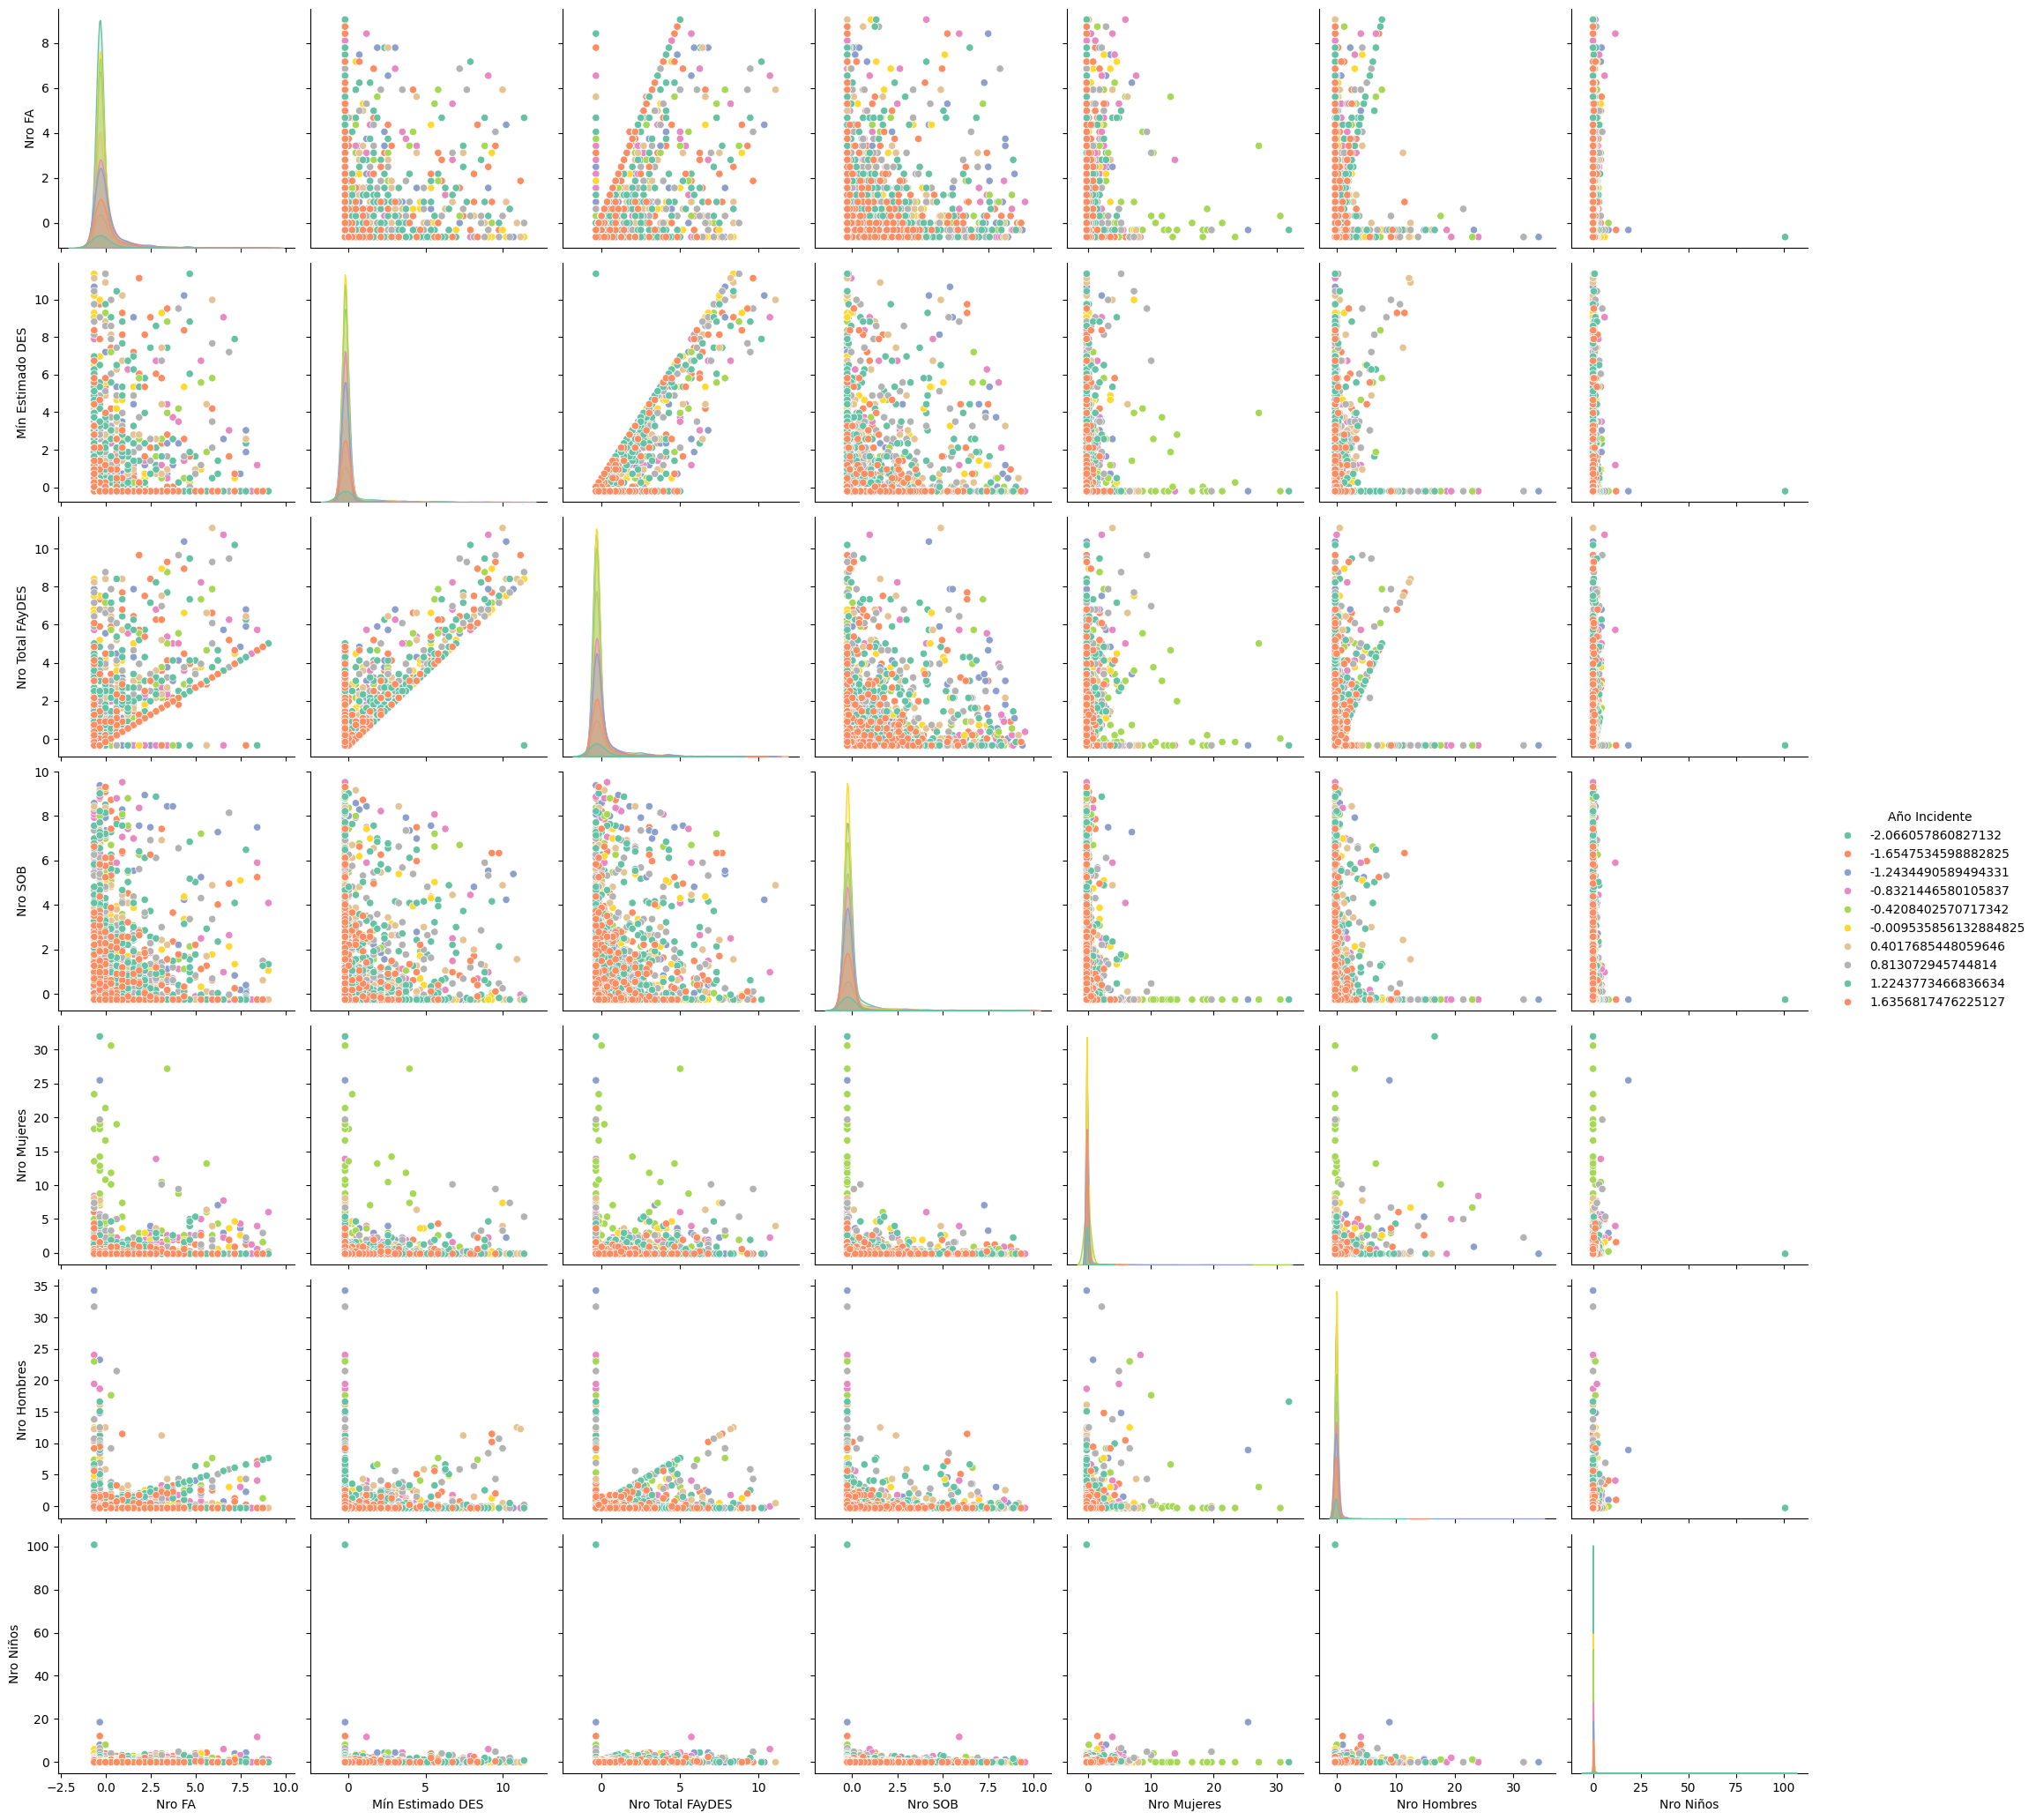

In [ ]:
#Pairplot
sns.pairplot(df_int ,hue = 'Año Incidente' , height= 3 , palette = 'Set2')